# Musterlösung Übungsblatt 1

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 1

In [2]:
A = np.zeros([10, 10])

for i in range(0, 10):
    A[i, :] = np.arange(i + 1, i + 11)

print('A =', A)

A = [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
 [ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
 [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
 [ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
 [ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]]


# Aufgabe 2

## Aufgabe 2.1

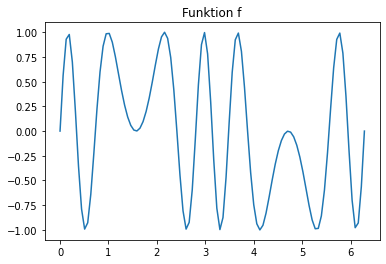

In [3]:
x = np.linspace(0, 2 * pi, 100)
y = np.sin(3 * pi * np.sin(x))
plt.plot(x, y)
plt.title('Funktion f');

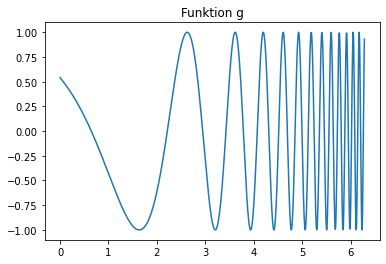

In [4]:
x = np.linspace(0, 2 * pi, 1000)
y = np.cos(np.exp(0.7 * x))
plt.plot(x, y)
plt.title('Funktion g');

## Aufgabe 2.1

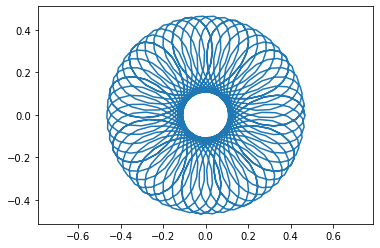

In [5]:
k = 0.82
l = 0.35

t = np.linspace(0, 100 * pi, 1000)
y1 = (1 - k) * np.cos(t) + l * k * np.cos((1 - k) / k * t)
y2 = (1 - k) * np.sin(t) - l * k * np.sin((1 - k) / k * t)

plt.plot(y1, y2)
plt.axis('equal');

Als interaktives Demo. Um nicht doppelt zu plotten bestimmen wir hier noch die Periode der Kurve. Die Funktion `doit` plottet die Roulettekurve für gegebene Werte von `l` und `k`, mit interact erzeugen wir die beiden Slider.

In [23]:
from fractions import Fraction
from ipywidgets import interact

def doit(l, k):
    a = Fraction((1 - k) / k).limit_denominator(1000)
    T = abs(a.denominator * 2 * pi)
    t = np.linspace(0, T, ceil(100 * T / (2 * pi)))
    y1 = (1 - k) * np.cos(t) + l * k * np.cos((1 - k) / k * t)
    y2 = (1 - k) * np.sin(t) - l * k * np.sin((1 - k) / k * t)

    plt.figure(figsize=(10, 10))
    plt.plot(y1, y2)
    plt.axis('equal')
    plt.axis('off')

interact(doit, l = (0.1, 2.0, 0.01), k = (0.1, 1, 0.01));



interactive(children=(FloatSlider(value=1.05, description='l', max=2.0, min=0.1, step=0.01), FloatSlider(value…

# Aufgabe 3

## Aufgabe 3.1

Lösung mit skalarem Parameter

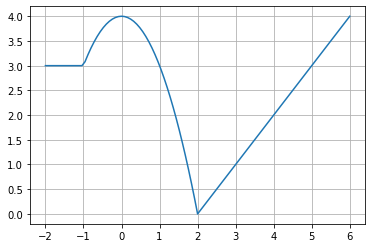

In [20]:
def pwfunc(x):
    if x < -1:
        return 3.0
    elif x < 2:
        return 4.0 - x*x
    else:
        return x - 2.0

x = np.linspace(-2, 6, 101)
y = np.zeros(len(x))
for i in range(0, len(x)):
    y[i] = pwfunc(x[i])

plt.plot(x, y)
plt.grid(True)

Erste Lösung für Array-Parameter mit mit `np.vectorize`.

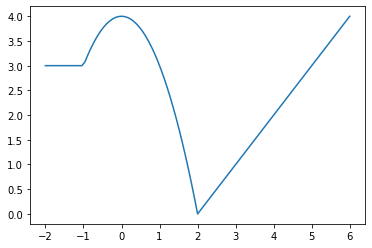

In [21]:
pwfunc_v1 = np.vectorize(pwfunc)

x = np.linspace(-2, 6, 101)
y = pwfunc_v1(x)
plt.plot(x, y);

Zweite Lösung für Array-Parameter via `np.piecewise`. 
Dazu müsste man aber noch erklären, was in Python eine Lambda-Funktion ist und das
werden wir nicht benötigen.

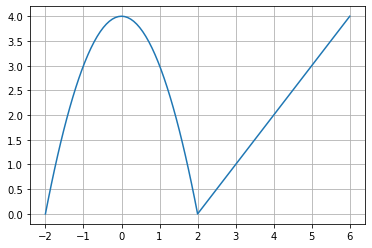

In [22]:
def pwfunc_v2(x):
    return np.piecewise(
        x, 
        [x < -1, x < 2], 
        [lambda x: 3, lambda x: 4 - x**2, lambda x: x - 2]
    )

x = np.linspace(-2, 6, 101)
plt.plot(x, pwfunc_v2(x))
plt.grid(True)

## Aufgabe 3.2

Die Funktion `make_fa` gibt für einen Wert von $a$ die Funktion $f_a$ zurück.

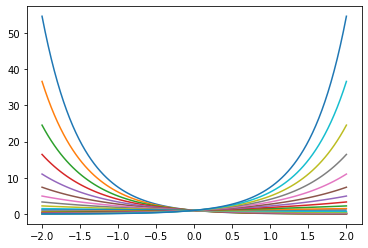

In [24]:
def make_fa(a):
    def fa(x):
        return np.exp(a * x)
    return fa

x = np.linspace(-2, 2, 100)
for a in np.linspace(-2, 2, 21):
    fa = make_fa(a)
    plt.plot(x, fa(x))